In [57]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

from sklearn.cluster import KMeans

In [58]:
# Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]

x_neat, y_neat  = datasets.make_blobs(n_samples   = 5000,
                                centers     = centers_neat,                             
                                cluster_std = 2,
                                random_state= 2)
#std dev will be equal in all directions



# "neat" clusters are composed of data points that are 
#normally distributed and isotropic (i.e., the same variance
#in all directions) across the 2 D of the plot. 



In [59]:
x_neat[:5]

array([[-7.70580012, 10.19111397],
       [-0.42283988, -8.60268319],
       [11.61232091,  1.99648944],
       [ 2.30591836, -4.24868234],
       [ 8.96381683,  1.86207667]])

In [60]:
y_neat

array([0, 1, 2, ..., 1, 0, 2])

In [61]:
import numpy as np
np.unique(y_neat)

array([0, 1, 2])

In [62]:
x_messy, y_messy = datasets.make_classification(n_samples=5000,
                                          n_features=4,
                                          n_classes=2,
                                          n_clusters_per_class=2,
                                          class_sep=2.2,
                                          shuffle=False,
                                          random_state=1)
#num of features should be > num of classes*n_cluster per class
# "messy" data is normally distributed as well, but not 
#isotropic - "anisotropic" 

In [63]:
y_messy

array([0, 0, 0, ..., 1, 1, 1])

In [64]:
np.unique(y_messy)

array([0, 1])

In [65]:
x_messy[:5]

array([[-1.54401776, -3.43309976, -2.74200505, -0.17140011],
       [-3.51531944, -1.20751798,  0.13888088, -1.78227862],
       [-3.56226897, -1.93814781, -0.5492204 , -1.65558144],
       [-1.58554839, -3.47614445, -2.76815445, -0.18639439],
       [-2.18311545, -2.38209918, -1.48987294, -0.76304587]])

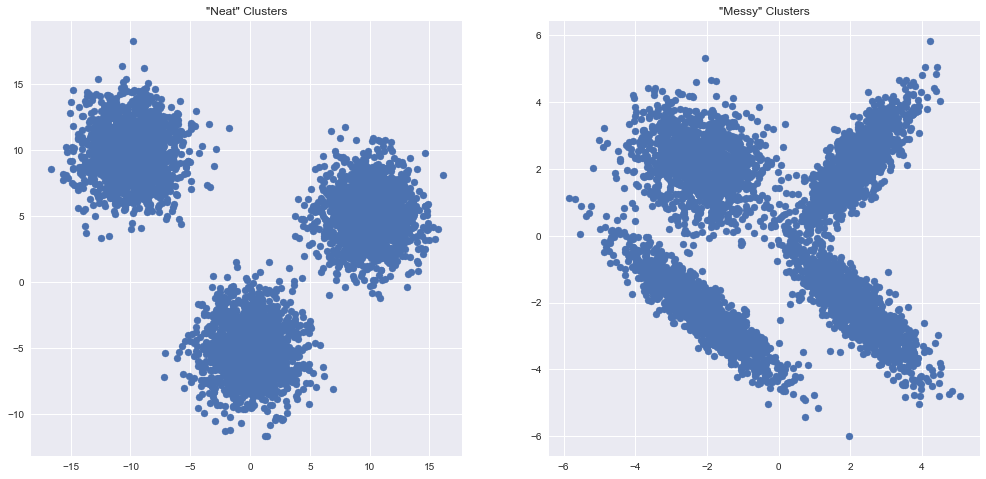

In [66]:
# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], 
            x_neat[:,1])
#plotting the first 2 features of messy data
plt.subplot(122, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], 
            x_messy[:,1]);

#### The data set on the left seems to clearly exhibit 3 well-defined, spherical clusters while the set on the right is hazy. Is it 2 clusters? Maybe 3? 

In [67]:
# Predict K-Means cluster membership
km_neat  = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=4, random_state=2).fit_predict(x_messy)


In [68]:
km_neat

array([1, 0, 2, ..., 0, 1, 2])

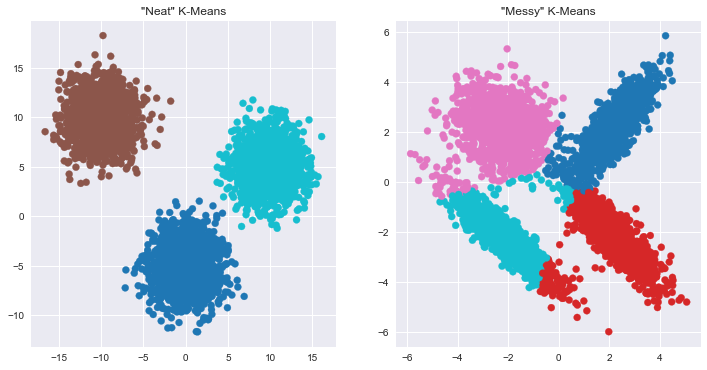

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(121, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap=cmap)

#c = km_messy implies color of the scatter points acc to km_messy
plt.subplot(122, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)

__performance on the __
- __"neat"__ data__ set achieves excellent clustering, 
- __"messy"__ data set — while not that bad — is suboptimal. 

- Visually, we can see 2, maybe 3, clusters — but K-means creates partitions that don't particularly reflect that. 

- Our clusters are of varying shapes and variances, which proves challenging for K-means to work with.

- "neat" clusters are composed of data points that are normally distributed and isotropic (i.e., the same variance in all directions) across the 2 D of the plot. 

- "messy" data is normally distributed as well, but not isotropic 
- "anisotropic" 
- Furthermore, the "messy" clusters aren't well separated, so K-means has a hard time judging which centroid each data point is closest to.

#### both data sets are artificially created, which one is more likely real?